In [1]:
import sys; sys.path.append("../")
import torch
import matplotlib.pyplot as plt
import cv2
import torch.nn.functional as F
from feature_extractor import FeatureExtractor
import numpy as np
import time
from cascade import CascadeClassifier
import os
from PIL import Image
from typing import List, Tuple
import pickle as pkl
from detect_face import find_face

In [2]:
trained_parent = '../hFeatures3/'

In [3]:
parent = '../../lfw_all/'

In [4]:
feature_extractor = FeatureExtractor(shape=(19,19), 
                                     percentile=20,
                                     all_features_file=trained_parent + "all_features.npz",
                                     selected_features_file=trained_parent + "selected_features.npz",
                                     labels_file=trained_parent + "labels.npy",
                                     indecies_file=trained_parent + "indecies.npy",
                                     verbose=False,
                                     batch_size=500)

In [5]:
cascadeClassifier = pkl.load(open(trained_parent + "cascadeClassifier.pkl", "rb"))

In [6]:
all_images_names = os.listdir(parent)
# all_images_names = sorted(all_images_names)
import random
random.shuffle(all_images_names)
all_images_names = [parent + name for name in all_images_names]
all_images_names[0]

'../../lfw_all/Jiang_Zemin_0020.jpg'

In [7]:
show_images = list(range(0, 20))
rectangles_only = True
resize_to = (100, 100)
random.shuffle(all_images_names)

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

RGB
(250, 250)


/home/akram/miniconda3/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


{'Getting Subwindows': 0.7653594017028809, 'Resizing Subwindows': 0.17535996437072754, 'Normalize': 7.867813110351562e-06, 'Extracting Features': 14.404148817062378, 'Classifying': 0.788942813873291}


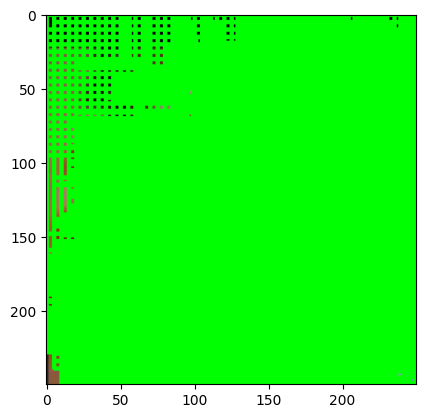

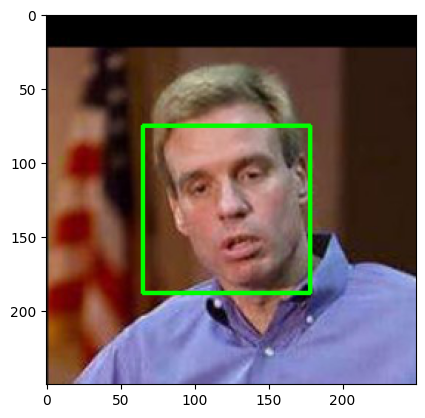

RGB
(250, 250)
{'Getting Subwindows': 0.09204769134521484, 'Resizing Subwindows': 0.11204862594604492, 'Normalize': 1.1444091796875e-05, 'Extracting Features': 0.3386070728302002, 'Classifying': 0.21510028839111328}


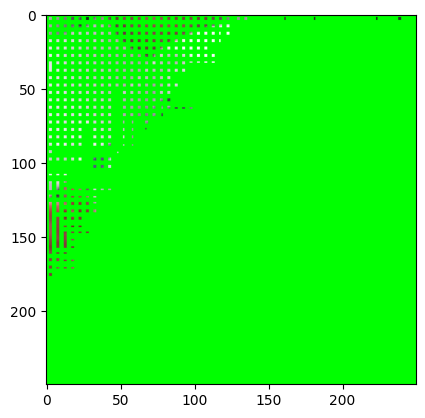

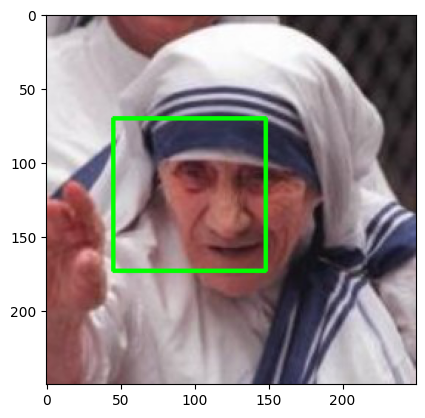

RGB
(250, 250)
{'Getting Subwindows': 0.07483410835266113, 'Resizing Subwindows': 0.09461236000061035, 'Normalize': 8.344650268554688e-06, 'Extracting Features': 0.3169519901275635, 'Classifying': 0.20273447036743164}


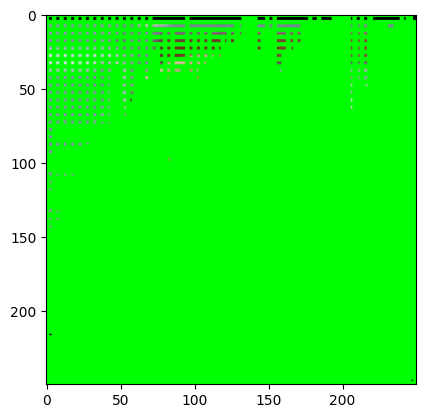

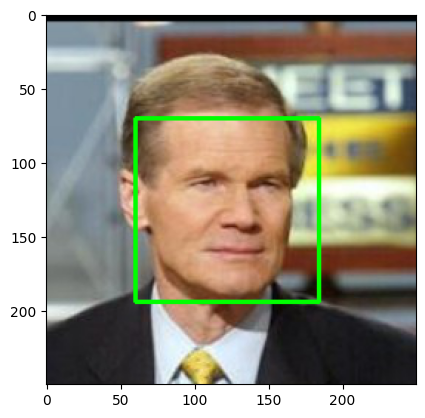

RGB
(250, 250)
{'Getting Subwindows': 0.07618999481201172, 'Resizing Subwindows': 0.10268139839172363, 'Normalize': 9.059906005859375e-06, 'Extracting Features': 0.33501434326171875, 'Classifying': 0.22465300559997559}


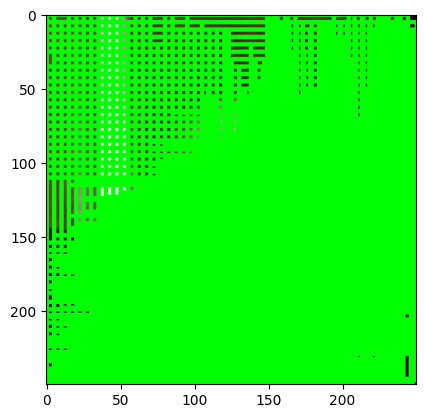

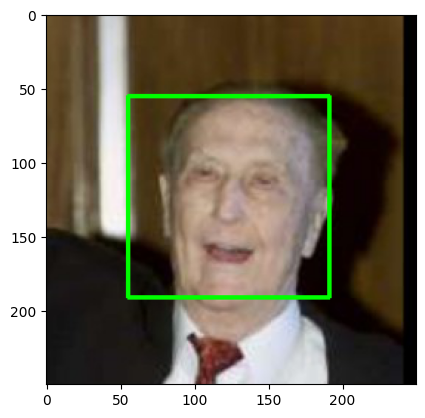

RGB
(250, 250)
{'Getting Subwindows': 0.08012962341308594, 'Resizing Subwindows': 0.10926699638366699, 'Normalize': 9.5367431640625e-06, 'Extracting Features': 0.5912411212921143, 'Classifying': 0.25017809867858887}


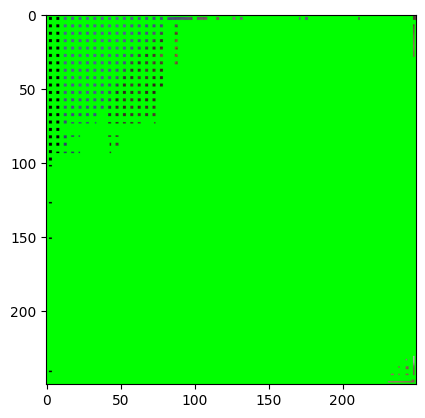

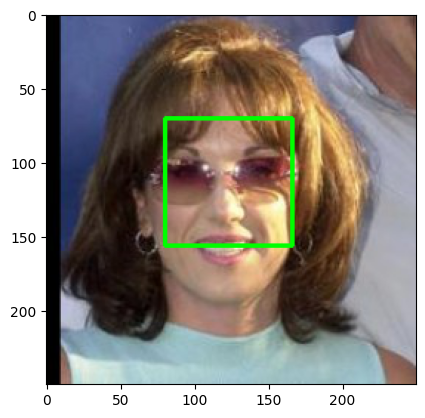

RGB
(250, 250)
{'Getting Subwindows': 0.07926392555236816, 'Resizing Subwindows': 0.11368608474731445, 'Normalize': 9.298324584960938e-06, 'Extracting Features': 0.34438633918762207, 'Classifying': 0.24567341804504395}


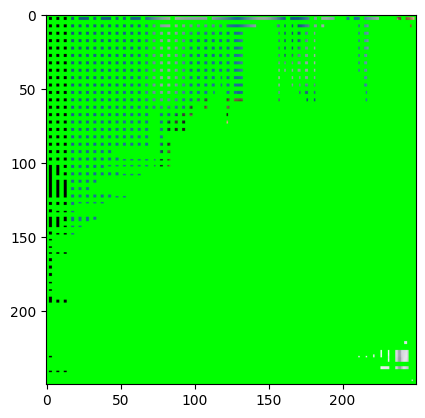

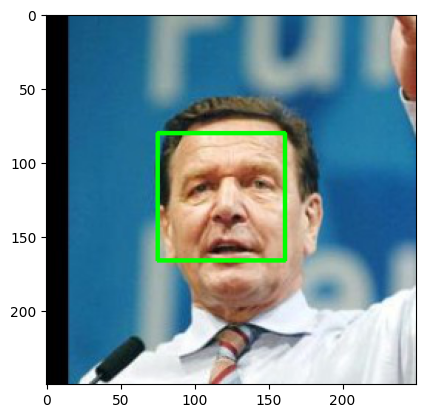

RGB
(250, 250)
{'Getting Subwindows': 0.07747769355773926, 'Resizing Subwindows': 0.09613323211669922, 'Normalize': 8.821487426757812e-06, 'Extracting Features': 0.32946324348449707, 'Classifying': 0.2301349639892578}


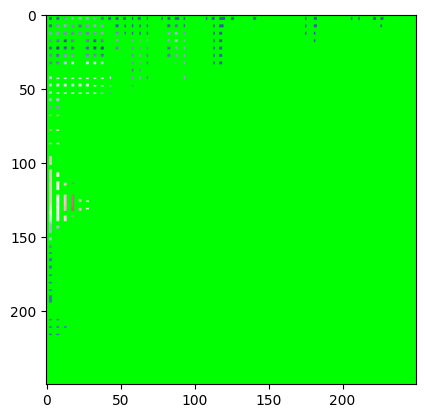

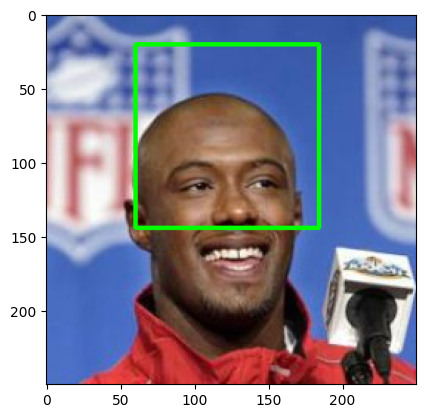

RGB
(250, 250)
{'Getting Subwindows': 0.09429526329040527, 'Resizing Subwindows': 0.09505152702331543, 'Normalize': 9.5367431640625e-06, 'Extracting Features': 0.32854390144348145, 'Classifying': 0.2179727554321289}


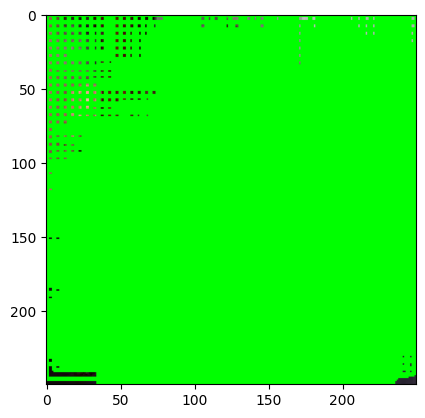

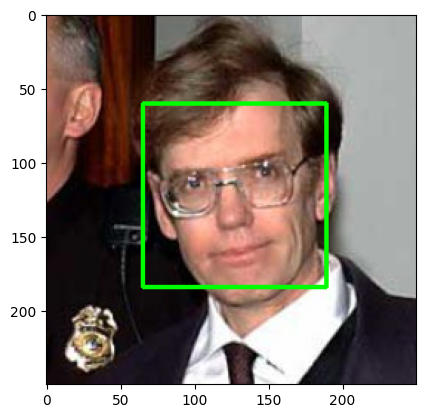

RGB
(250, 250)
{'Getting Subwindows': 0.0898592472076416, 'Resizing Subwindows': 0.09643244743347168, 'Normalize': 1.049041748046875e-05, 'Extracting Features': 0.3424215316772461, 'Classifying': 0.25667786598205566}


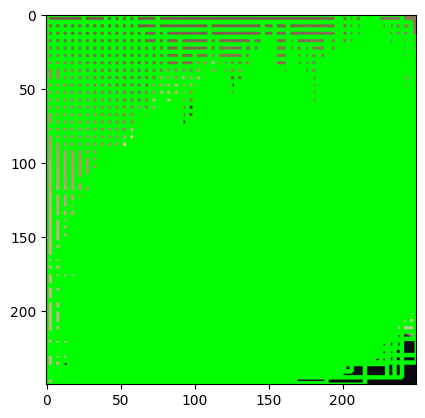

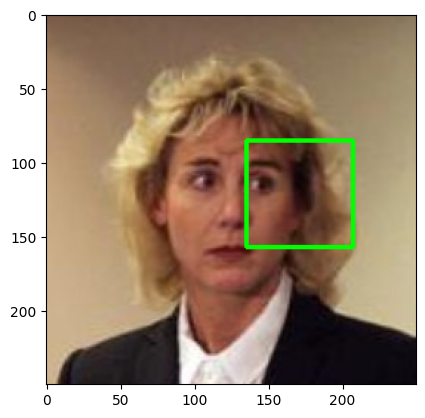

RGB
(250, 250)
{'Getting Subwindows': 0.09018540382385254, 'Resizing Subwindows': 0.09664726257324219, 'Normalize': 8.106231689453125e-06, 'Extracting Features': 0.34752964973449707, 'Classifying': 0.26270365715026855}


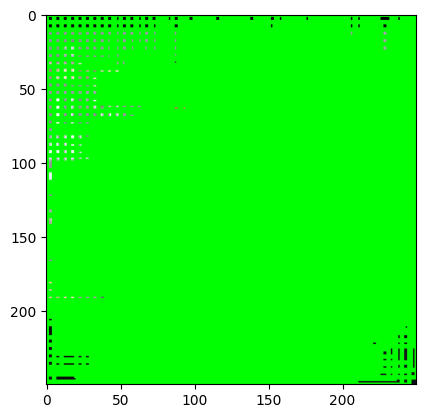

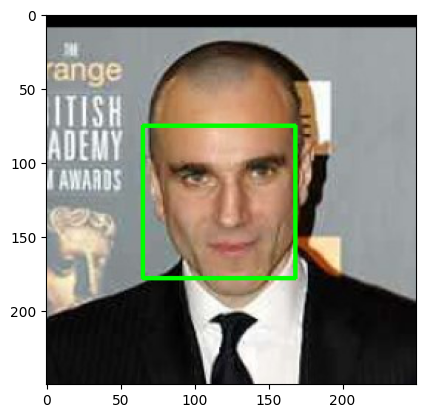

RGB
(250, 250)
{'Getting Subwindows': 0.07759523391723633, 'Resizing Subwindows': 0.1100318431854248, 'Normalize': 8.106231689453125e-06, 'Extracting Features': 0.3377382755279541, 'Classifying': 0.23777341842651367}


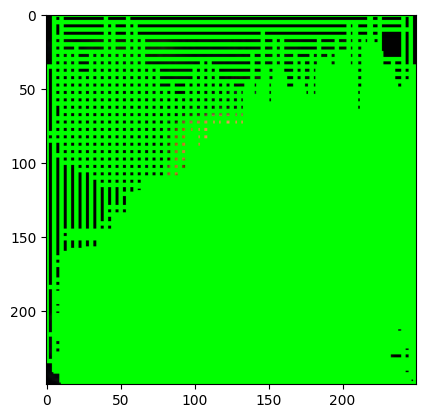

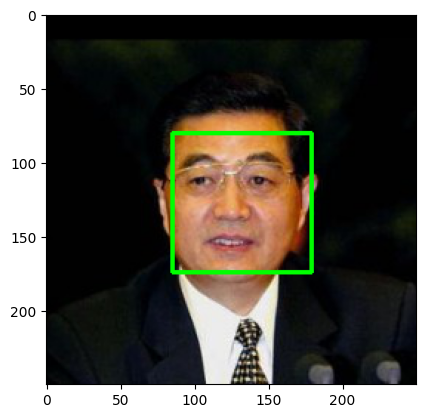

RGB
(250, 250)
{'Getting Subwindows': 0.0827934741973877, 'Resizing Subwindows': 0.10672807693481445, 'Normalize': 8.58306884765625e-06, 'Extracting Features': 0.3231773376464844, 'Classifying': 0.20088505744934082}


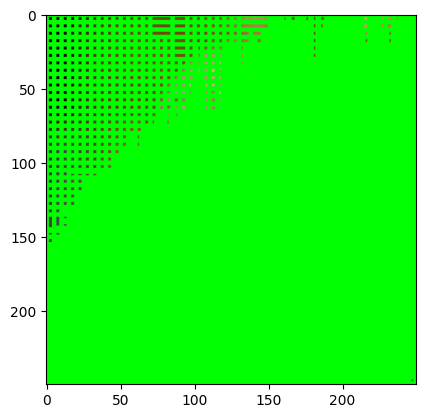

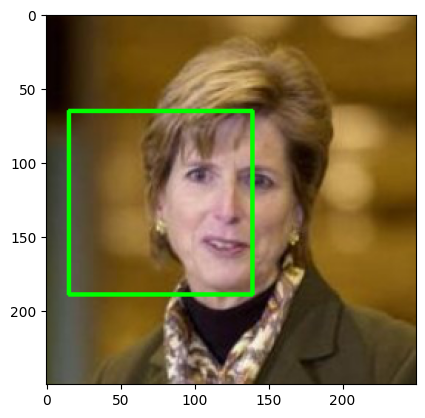

RGB
(250, 250)
{'Getting Subwindows': 0.07613945007324219, 'Resizing Subwindows': 0.10398006439208984, 'Normalize': 7.62939453125e-06, 'Extracting Features': 0.3412504196166992, 'Classifying': 0.23312878608703613}


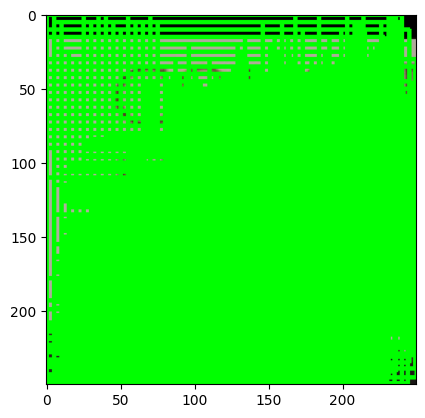

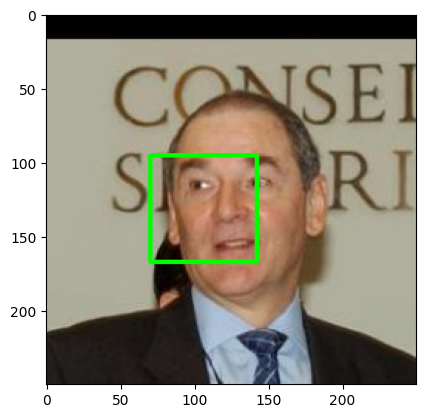

RGB
(250, 250)
{'Getting Subwindows': 0.09673833847045898, 'Resizing Subwindows': 0.0990602970123291, 'Normalize': 8.821487426757812e-06, 'Extracting Features': 0.3230769634246826, 'Classifying': 0.21061968803405762}


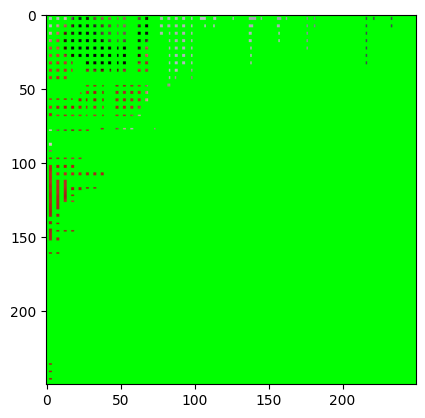

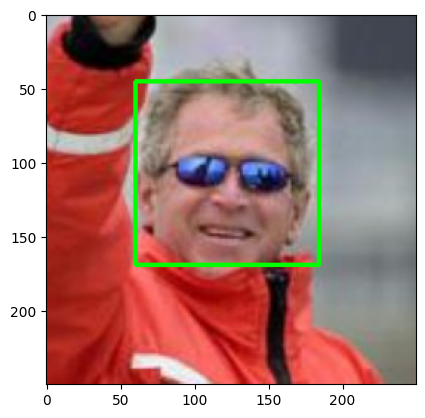

RGB
(250, 250)
{'Getting Subwindows': 0.11262917518615723, 'Resizing Subwindows': 0.10716557502746582, 'Normalize': 9.5367431640625e-06, 'Extracting Features': 0.34479784965515137, 'Classifying': 0.24620580673217773}


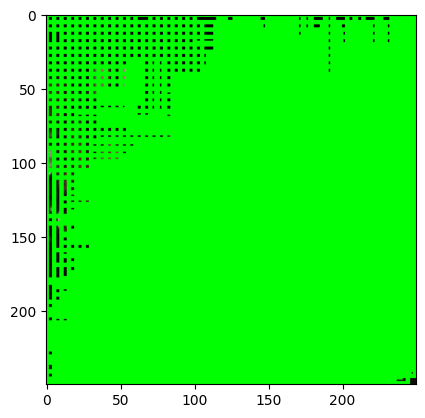

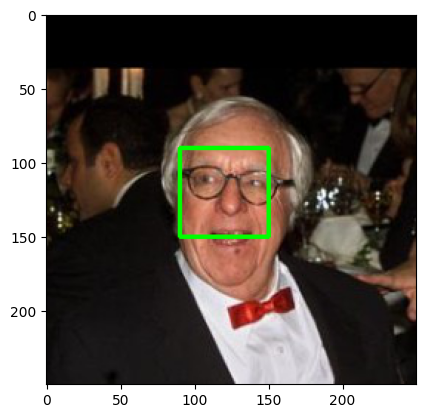

RGB
(250, 250)
{'Getting Subwindows': 0.10431647300720215, 'Resizing Subwindows': 0.0948171615600586, 'Normalize': 7.867813110351562e-06, 'Extracting Features': 0.3139665126800537, 'Classifying': 0.20267510414123535}


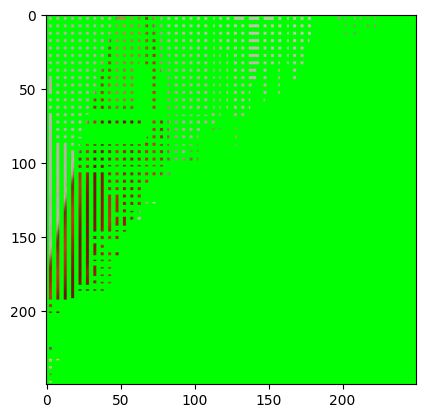

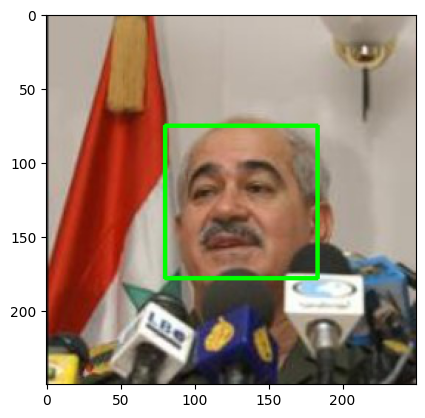

RGB
(250, 250)
{'Getting Subwindows': 0.09883952140808105, 'Resizing Subwindows': 0.08916425704956055, 'Normalize': 9.298324584960938e-06, 'Extracting Features': 0.3302001953125, 'Classifying': 0.2111983299255371}


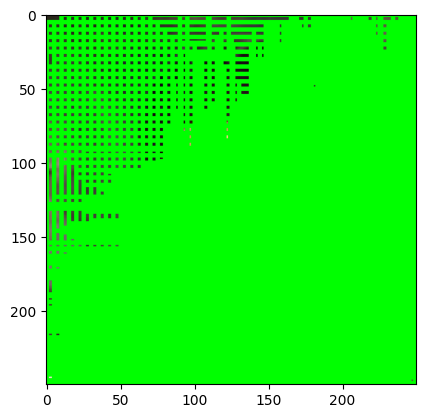

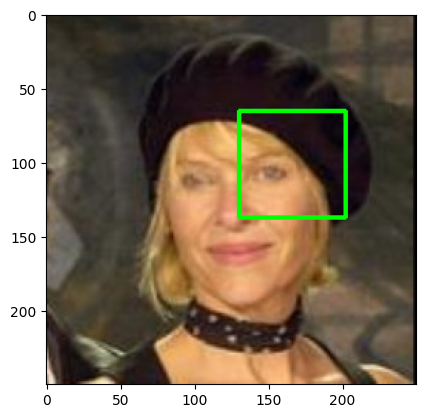

RGB
(250, 250)
{'Getting Subwindows': 0.0970449447631836, 'Resizing Subwindows': 0.11310029029846191, 'Normalize': 7.3909759521484375e-06, 'Extracting Features': 0.34761881828308105, 'Classifying': 0.23458433151245117}


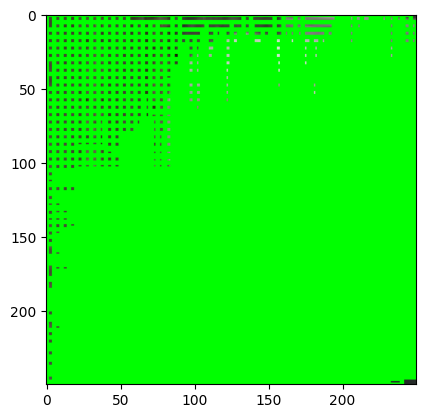

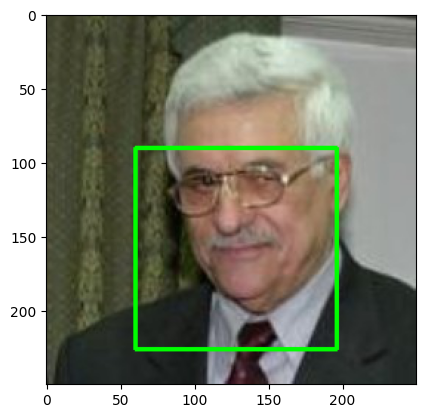

RGB
(250, 250)
{'Getting Subwindows': 0.09170341491699219, 'Resizing Subwindows': 0.11417746543884277, 'Normalize': 9.059906005859375e-06, 'Extracting Features': 0.3455543518066406, 'Classifying': 0.21977615356445312}


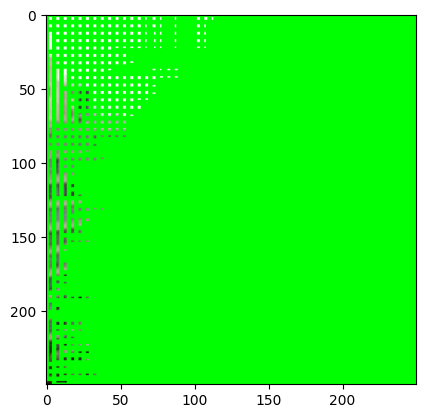

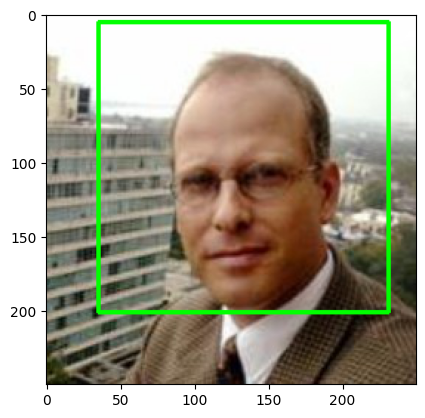

RGB
(250, 250)
{'Getting Subwindows': 0.10960054397583008, 'Resizing Subwindows': 0.09281349182128906, 'Normalize': 9.298324584960938e-06, 'Extracting Features': 0.32652807235717773, 'Classifying': 0.22452425956726074}


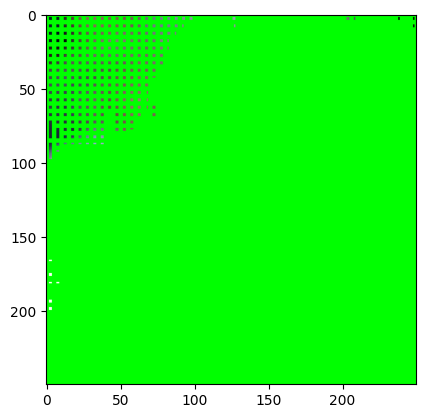

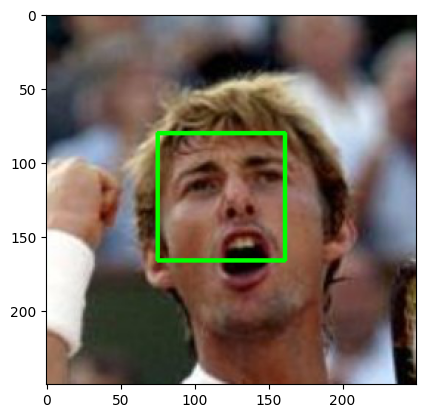

In [9]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)

  # >>>> Normalize image <<<<
  # normalize image
  img2 = (img2 - img2.mean()) / img2.std()
  # img2 = cv2.resize(img, resize_to)
  # print(img2.shape)

  img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # resize image
  # img2 = cv2.resize(img2, (570, 380))

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # find face
  # >>>> Find face <<<<
  face_coordinates, region_max_conf, max_conf , timing=\
                  find_face(img2, \
                              cascadeClassifier, \
                              feature_extractor, \
                              window_size=(19, 19), \
                              scale_dist=1.1, \
                              max_size=300, \
                              stride=5, \
                              device=device, \
                              verbose=False,
                              report_time=True)
  print(timing)
  # region_max_conf *= img.shape[0] / resize_to[0]
  # ++++++++++++++++++++
  # rectangles 
  # >>>> Draw rectangles <<<<
  tmp_img = img.copy()
  for face_coordinate in face_coordinates:
      for x1, y1, x2, y2 in face_coordinate:
          cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  # if not rectangles_only:          
  plt.imshow(tmp_img)
  plt.show()

  # >>>> Draw rectangles with max confidence <<<<
  # amx confidence
  tmp_img = img.copy()
  x1, y1, x2, y2 = region_max_conf
  cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
  plt.imshow(tmp_img)
  plt.show()

